In [2]:
import scipy.io as sio
import numpy as np

In [30]:
def save_as_gml(nodes,edges):
    f = open('graph.gml','w')
    f.write('graph [\n')
    f.write('  node [\n')
    for i in nodes:
        f.write('    id '+str(i)+'\n')
        f.write('    label '+str(i)+'\n')

        f.write('  ]\n')

    for i in edges:
        f.write('  edge [\n')
        f.write('    source '+str(i[0])+'\n')
        f.write('    target '+str(i[1])+'\n')
        f.write('    label '+str(0)+'\n')
        f.write('  ]\n')
    f.write(']\n')

def save_text(edges):
    with open("graph.txt","w") as f:
        for edge in edges:
            if int(edge[0]) < (edge[1]):
                f.write(str(edge[0])+" "+str(edge[1])+" {}\n")
            else:
                f.write(str(edge[1])+" "+str(edge[0])+" {}\n")



In [17]:
import scipy.io as sio
map_key=sio.loadmat("../map_key.mat")

edges=[]
edge_sort=[]
vertices=[]
for edge in map_key["map_key"][0]:
    edges.append(edge[0].split("+"))
# print(edges)
for i in range(64984):
    vertices.append(i)

# save_as_gml(nodes=vertices,edges=edges)
for edge in edges:
    edge_sort.append((int(edge[0]),edge[1]) if int(edge[0]) < int(edge[1]) else (int(edge[1]),edge[0]))
edge_sort
edge_sort.sort()
#
edge_dict={}
for edge in edge_sort:
    if edge[0] not in edge_dict.keys():
        edge_dict[edge[0]]=[int(edge[1])]
    else:
        edge_dict[edge[0]].append(int(edge[1]))

for key,value in edge_dict.items():
    
    edge_dict[key]=sorted(value)
    

edge_list=[]
for key,value in edge_dict.items():
    for i in value:
        edge_list.append((int(key),i))

# save_text(edge_list)
print(len(edge_list))
# save_text(edge_dict)

37732


In [18]:
#映射节点关系
node_unique=[]
for i in edge_list:
    if i[0] not in node_unique:
        node_unique.append(i[0])
    if i[1] not in node_unique:
        node_unique.append(i[1])
# print(node_unique)
node_dic={}
for i in range(len(node_unique)):
    node_dic[node_unique[i]]=i

edge_list_trans=[]
for edge in edge_list:
    #去除自环的部分节点，不添加到内容中
    # if node_dic[edge[0]]==node_dic[edge[1]]:
    #     continue
    edge_list_trans.append((node_dic[edge[0]],node_dic[edge[1]]))
# print(edge_list_trans)

In [ ]:
#获取逆映射列表
dic_reverse=dict((v,k) for k,v in node_dic.items())
print(dic_reverse)

# print(edge_dict)

In [27]:

def save_text(edges):
    with open("graph2.txt","w") as f:
        for edge in edges:
            # if edge[0]==edge[1]:
            #     continue
            if int(edge[0]) < (edge[1]):
                f.write(str(edge[0])+" "+str(edge[1])+"\n")
            else:
                f.write(str(edge[1])+" "+str(edge[0])+"\n")

In [28]:
save_text(edge_list)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
with open("graph1.txt","r" ) as f:
    line=f.readline()
    while line:
        edge=line.strip().split(" ")
        G.add_edge(edge[0],edge[1])
        line=f.readline()
# nx.draw(G,with_labels=G.nodes())
# plt.show()
# plt.savefig("graph1.png")

In [22]:
nx.read_edgelist("graph1.txt")

In [31]:

# G1=nx.to_undirected(G1)


In [24]:
G2=nx.read_edgelist('graph1.txt', create_using=nx.DiGraph())
# G2=nx.to_undirected(G2)

In [12]:
nx.write_gml(G2,"graph2.gml")

In [53]:
import networkx as nx
G1=nx.read_edgelist('graph2.txt', create_using=nx.DiGraph())
print(list(nx.simple_cycles(G1)))

[['308'], ['791'], ['833'], ['834'], ['872'], ['2744'], ['2779'], ['2812'], ['2848'], ['2855'], ['2886'], ['2945'], ['3005'], ['3029'], ['3054'], ['3080'], ['3244'], ['3263'], ['3274'], ['3314'], ['3356'], ['3360'], ['5019'], ['6279'], ['7710'], ['12330'], ['12412'], ['16894'], ['17455'], ['27583'], ['27645'], ['29153'], ['30399'], ['30457'], ['32529'], ['32854'], ['35337'], ['35371'], ['35402'], ['35520'], ['35548'], ['35571'], ['35594'], ['35703'], ['35796'], ['35842'], ['35843'], ['35861'], ['36837'], ['37898'], ['37899'], ['37948'], ['41901'], ['41936'], ['42104'], ['42163'], ['45114'], ['48605'], ['49361'], ['51541'], ['55856'], ['55985'], ['57124'], ['60578'], ['62337'], ['63271'], ['63306'], ['63428'], ['64075']]


In [16]:
G2.remove_edges_from(nx. (G2))
G2=nx.free(G2)
print(G2.is_connected())

AttributeError: module networkx has no attribute free

In [ ]:
with open("graph1.txt","r" ) as f:
    line=f.readline()
    while line:
        edge=line.strip().split(" ")
        G2.add_edge(edge[0],edge[1])
        line=f.readline()

In [ ]:
with open("result_graph1.txt","r" ) as f:
    line=f.readlines()
print([x.strip() for x in line])


In [ ]:
#读取结果文件，获取原始节点

with open("result_graph1.txt","r" ) as f:
    line=f.readlines()
nodes=[x.strip() for x in line]
node_original=[]
for node in nodes:
    node_original.append(dic_reverse[int(node)])
print(node_original)


In [16]:

node_form_mat=node = sio.loadmat('../node.mat')
print(node["ans"][0][0][0].T)
node_matrix=node["ans"][0][0][0].T
with open("node_result.txt","w" ) as f:
    for i in node_original:
        f.write(",".join([str(x) for x in node_matrix[i]])+"\n")

[[ -9.203461 -39.663757  26.138397]
 [-22.236511 -38.524216  59.275558]
 [-47.786926  -5.991791  34.802025]
 ...
 [ 60.034302 -34.216621 -11.112442]
 [ 59.615402 -33.664948  -9.494114]
 [ 58.297832 -35.000595 -10.267822]]


In [42]:
#读取带权值的边节点，转换为gml格式

import scipy.io as sio
edge_key=sio.loadmat("../edge_key.mat")["key"][0]
edge_value=sio.loadmat("../edge_value.mat")["value"][0]
edge_key_list=[edge_key[i][0].split("+") for i in range(len(edge_key))]
edge_key_list=[[int(x[0]),int(x[1])] if int(x[0])<int(x[1]) else [int(x[1]),int(x[0])]for x in edge_key_list]
# edge_key_list=list(set(edge_key_list))
edge_value_list=[int(edge_value[i]) for i in range(len(edge_value))]
# print(edge_value_list)
print(len(edge_key_list),len(edge_value_list))
# print(edge_key_list)
# print(len(edge_key_list),len(edge_value_list))
#
#去除自环
remove_list=[]
for i in range(len(edge_key_list)):
    #自环
    if edge_key_list[i][0]==edge_key_list[i][1]:
        remove_list.append((i,edge_key_list[i]))
    #重复边
    elif edge_key_list.count(edge_key_list[i])>1:
        remove_list.append((i,edge_key_list[i]))
        # print(i)
# print(remove_list)
value__remove_list=[edge_value_list[i] for i,_ in remove_list]
for i,ele in remove_list:

    edge_key_list.remove(ele)

for i in value__remove_list:
     edge_value_list.remove(i)
#映射节点信息
edge_unique=[]
for i in edge_key_list:
    if int(i[0]) not in edge_unique:
        edge_unique.append(int(i[0]))
    if int(i[1]) not in edge_unique:
        edge_unique.append(int(i[1]))
edge_unique.sort()
# print(edge_unique)
#映射
edge_dic={}
for i in range(len(edge_unique)):
    edge_dic[edge_unique[i]]=i
weight_list=[]
edge_all=[]
for i in range(len(edge_key_list)):
    edge_all.extend([edge_key_list[i][0],edge_key_list[i][1]])
for i in edge_unique:
    weight_list.append(edge_all.count(i))
# print(weight_list)
print(len(edge_key_list),len(edge_unique))




37732 37732
37509 16695


In [28]:

def save_gml(edges,values,max_edge,edge_dic):
    with open("graph_test_oringin.gml","w") as f:
        f.write("graph [\n")
        # f.write("directed 1\n")
        for i in range((max_edge)):
            f.write("node [\n")
            f.write("id "+str(i)+"\n")
            f.write("label \""+str(i)+"\"\n")
            f.write("weight "+str(float(values[i])/10)+"\n")
            f.write("]\n")
        for i in range(len(edges)):
            f.write("edge [\n")
            f.write("source "+str(edge_dic[int(edges[i][0])])+"\n")
            f.write("target "+str(edge_dic[int(edges[i][1])])+"\n")
            # f.write("value "+str(values[i])+"\n")
            f.write("]\n")

        f.write("]\n")
save_gml(edge_key_list,weight_list,len(edge_unique),edge_dic)
# print(weight_list)

In [22]:
import networkx as nx
g=nx.read_gml("graph_test.gml")
# print(g.edges())

print(g.simple_cycles())

AttributeError: 'Graph' object has no attribute 'simple_cycles'

In [30]:
print(edge_value_list[9682])

6


In [15]:
#比较两个结果
result_no_wright=[]
result_weight=[]
with open("result_graph1.txt","r") as f:
    line=f.readlines()
    for i in range(len(line)):
        result_no_wright.append(line[i].strip())
with open("graph_test_degree.txt","r") as f:
    line=f.readlines()
    for i in range(len(line)):
        result_weight.append(line[i].strip())
common_list=list(set(result_no_wright[:3000]).intersection(result_weight[:3000]))
common=list(set(result_no_wright[:]).intersection(result_weight[:]))
print("使用无权图得到的节点个数：",len(result_no_wright))
print("使用带权图得到的节点个数：",len(result_weight))
print("前三千个节点中重叠的节点个数为：",len(common_list))
print("总共重叠节点为：",len(common))
print()

使用无权图得到的节点个数： 6646
使用带权图得到的节点个数： 8972
前三千个节点中重叠的节点个数为： 486
总共重叠节点为： 3590



In [43]:
import scipy.io as sio
surface=sio.loadmat("../surf.mat")
points=surface["surf"][0][0][0].T
# print(points.T)
#
# print(result_no_wright)
edge_dic_rever=dict(zip(edge_dic.values(),edge_dic.keys()))
# print(edge_dic_rever)
# print(len(result_no_wright))
# print(edge_dic_rever)
result=[edge_dic_rever[int(x)]for x in result_no_wright]
result1=[edge_dic_rever[int(x)]for x in result_weight]
# print(max(result))
# print(points)
with open("nodes.txt","w") as f:
    for i in points:
        f.write(str(i[0])+' '+str(i[1])+' '+str(i[2])+"\n")
# print(result1)
print(len(points))

64984


In [41]:
#将节点信息写入到vtk
def save_vtk(result,filename):
    with open(filename,"w") as f:
        f.write("# vtk DataFile Version 3.0\nmesh surface\nASCII\nDATASET POLYDATA\n")
        f.write("POINTS "+str(len(result))+" float\n")
        for i in result:
            point=points[edge_dic_rever[int(i)]]
            f.write(str(point[0])+" "+str(point[1])+" "+str(point[2])+"\n")
save_vtk(result_weight,"graph2.vtk")


[300, 2100, 100, 100, 500, 600, 100, 200, 200, 100, 100, 200, 100, 400, 200, 200, 100, 100, 200, 100, 200, 100, 100, 200, 100, 200, 200, 100, 200, 100, 100, 300, 100, 100, 100, 100, 100, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


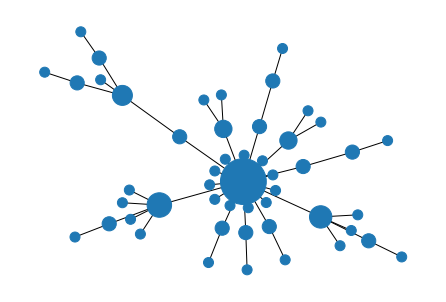

In [51]:
import networkx as network
import matplotlib.pyplot as plot

ba = network.barabasi_albert_graph(50, 1)
ps = network.spring_layout(ba)
degree=ba.degree()
de=[x[1] *100for x in degree]
print(de)
# print(degree.values())
# print([int(v) * 100 for v in degree.values()])
network.draw(ba, ps, with_labels = False, node_size =de)
plot.gcf().savefig("BA.png")
plot.show()


<Figure size 432x288 with 0 Axes>